# 6. Compound data types

We covered scalar data types already, so this will be about non-scalar data types. The most important built-in data types are `list`, `str`, `dict`, `generators` and `set`. For time constraints we won't cover `sets` and keep the part on `generators` short. This gives us more time for `numpy arrays`, which are the standard data type for numerical data in scientific Python.

## 6.1 Indexing

For compound data types you will have to know how to assess specific objects from the collection. Since the general principle is different than in MATLAB or R for `lists`, `tuples` and `numpy arrays`, we'll cover the general idea here before applying it to `list`s.

### Zero-based indexing

Indexing in Python starts at 0. Indexing with slices `[from_index:to_index]` doesn't include the `to_index`. This is one of the few things that you'll need a while to get used to. My experience is that you can switch back and forth between 1- and 0-based indexing on the fly if you got used to both once. 

Arguably 0-based indexing is more in line with what happens in your computer's memory and it can help avoid [off-by-one errors](https://en.wikipedia.org/wiki/Off-by-one_error). 1-based indexing is more intuitive for most people and closer to mathematical notation. Just treat it as an arbitraty choice that you get used to. If you want to learn Python, there's no way around it.

We can use some visualization to get the idea down. Remember that a  variable is like an index finger that points somewhere in memory? Now for a second imagine the memory to be 1-dimensional. Since the first element starts where the whole object in memory starts, the 0 means: Access the element with an offset of 0. Now you can think about zero-based indexing like this:

```Python
a = np.arange(10) # same as 0:9 in MATLAB
a  #shows me where the object starts in memory.
a[0] #shows me the position of the first element of a, i.e. the one where a starts
```
Since `a` already points at the memory adress of the first element, we don't need to "go" any further. 

For those of you who consider themselves "visual learners" (yeah, I know...). Consider the same vector of integers from 1 to 10:

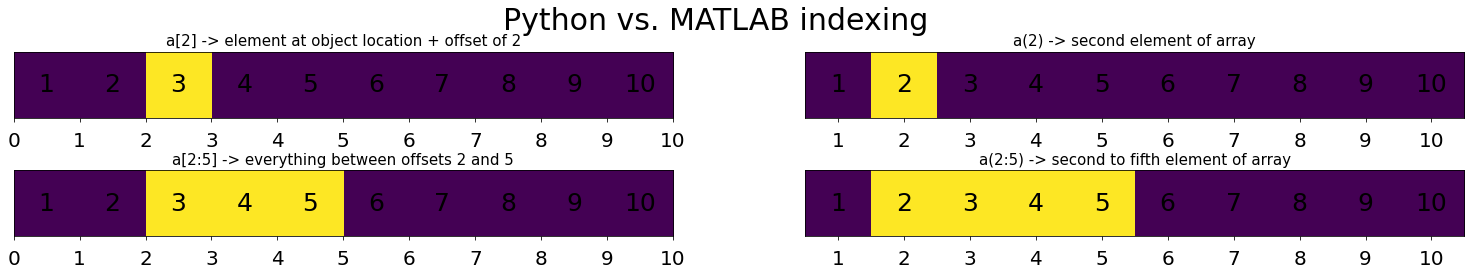

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

fig, axs = plt.subplots(
    ncols=2, 
    nrows=2, 
    figsize=(26, 4)
)
fig.suptitle('Python vs. MATLAB indexing', fontsize=30)

for x, y in product(range(2), range(2)):
    _ax = axs[x, y]
    _ax.set_xlim((-0.5, 9.5))
    _ax.imshow(np.zeros((1, 10)))
    _ax.set_yticks([])
    if not y:
        _ax.set_xticks(np.arange(-0.5,10.5,1))
        _ax.set_xticklabels([str(x) for x in range(11)], fontsize=20)
        if not x:
            _ax.imshow(np.array([0]*2 + [1] + [0]* 7)[np.newaxis, :])
            _ax.set_title("a[2] -> element at object location + offset of 2", fontsize=15)
        else:
            _ax.imshow(np.array([0]*2 + [1] * 3 + [0] * 5)[np.newaxis, ])
            _ax.set_title("a[2:5] -> everything between offsets 2 and 5", fontsize=15)
    else:
        _ax.set_xticks(np.arange(10))
        _ax.set_xticklabels([str(x + 1) for x in range(10)], fontsize=20)
        if not x:
            _ax.imshow(np.array([0]*1 + [1] + [0]* 8)[np.newaxis, :])
            _ax.set_title("a(2) -> second element of array", fontsize=15)
        else:
            _ax.imshow(np.array( [0]*1 + [1] * 4 + [0] * 5)[np.newaxis,:])
            _ax.set_title("a(2:5) -> second to fifth element of array", fontsize=15)
    
    _ax.tick_params(axis='x', which='both', direction='out', pad=10)
    for x in np.arange(10):
        _ax.text(
            x,
            0,
            str(x+1), 
            fontsize=25,
            horizontalalignment='center',
            verticalalignment='center' 
        )
plt.show()

Try the following to see if you got the principle. This is using a list, but it could be a tuple as well.

**Exercises**

   1. Select the second value (1) from the list.
   2. Select the subset [1, 2, 3] from the list.
   3. Replace the value at index 2 with `99`.

In [1]:
a_list = [0, 1, 2, 3, 4]

In [38]:
#your code here


### Indexing from the end

You can also index from the end using negative indices. This is 1-based, i.e. `a[-1]` would give us the last value of `a`. Have a look:

In [2]:
a = list(range(10))
print(a)
print(f"{a[-1] = }")
print(f"{a[-3] = }")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a[-1] = 9
a[-3] = 7


## 6.2 Lists

Let's get started with the first collection data type: `list`s. Lists are very flexible data types as they can hold virtually every Python object. They are also **mutable** which means that you can change them after creation - add or delete items. The closest equivalent in MATLAB would be `cells`.

They can be constructed like this:

```Python
list_1 = ['a', 2, 92.1]
```

**Exercise**

Create a list that contains any number of arbitrary objects like `ints`, `functions` and so on.

In [4]:
#your code here


### Create lists from other objects

You can use the `list()`-function to create a list from another object like this:
```Python
new_list = list(old_object)

```

You will need this for objects of type `generator`, `filter` and others. You don't have to understand this now, but take a look at how `range()` behaves.

In [1]:
a = range(4)
print(a)
print(type(a))

range(0, 4)
<class 'range'>


Until now this is a `range` object. If you want to use `range` to create a collection of ordered numbers, you can transform it to a `list`:

In [27]:
#your code here


### List concatenation

Because of the square brackets it is easy to confuse lists with MATLAB arrays. The behave **completely** different. Consider the following cell, think about what you except and run it:

In [2]:
a = [1, 2, 3] + [3, 2, 1];
print(a)

[1, 2, 3, 3, 2, 1]


So yeah. That's how list concatenation works. 

### Lists methods

Lists have methods to manipulate their content or get information, like `list.append()`, `list.remove()`, `list.index()`. We can't cover everything, see [here](https://docs.python.org/3/tutorial/datastructures.html) for the complete list. This might be confusing if you're used to MATLAB or R, but that's why we took the detour to object oriented programming.

In [2]:
a = [sum, 1, 'word']

**Exercise**

Use the `list.append()` method to append a `float` of your choice (or anything really) to the list `a`. Then remove the `int` 1. Finally retrieve the index of 'word'. Be aware that these work `in-place`, i.e. you don't need to return something.

In [2]:
#your code here


### len()

`len()` is a built-in function that's not part of the classes `list` or `tuple`. That means you can't call `my_list.len()`, but have to use the imperative version: `len(my_list)`. It works on lists, tuples, dictionaries. Even data types from third party packages like **pandas** and **numpy**. The length of an object starts with one, not zero. There's not much more to say about it. Try it yourself and get the length of the following objects:

In [7]:
my_list = [1, 2, 3]
my_tuple = (1, 2, 3)
my_dict = {'a': 1, 'b': 2}

In [12]:
#your code here


(full disclosure: You could actually call something like `mytuple.__len__()`, but you wouldn't usually. This is an example of a polymorphism, but that's beyond the scope here)

## 6.3 Tuples

Tuples are the immutable version of lists. that means, once they are created, they can't be changed. Apart from that, they can be used pretty interchangeably with lists. They can also hold every other object. The construction syntax is one of the following:

```Python
my_tuple_1 = (1, 2, 3)
my_tuple_2 = tuple(other_object)
my_tuple_3 = 1, 2, 3
```

As you see, the parentheses are added implicitely. If you want to have a tuple of length one, you have to add a comma. Otherwise the parentheses are interpreted in a mathematical sense:

In [10]:
a = (1)
b = (1,)
c = 1,
for i in [a, b, c]:
    print(i, type(i).__name__)

1 int
(1,) tuple
(1,) tuple


<br/>

**Exercise**

Create a tuple of an integer, a function and a string. Use indexing to retrieve the string. Try to change one of the elements and find out what **immutability** means.

In [5]:
#your code here


## 6.4 Strings and characters

Strings and characters are the same thing in Python. Just like tuples they are **immutable**, meaning that you can't change them after creation. You can use methods to return manipulated versions though.

You can use either `"double quotes"` or `'single quotes'`, they act the same.

In [6]:
double_quote = "string"
single_quote = 'string'
print(double_quote == single_quote)

True


You can escape a quote in your string with a bashslash (`'That\'s it'`) or by using double quotes for the string and single quotes within (`"What's up"`).

### String concatenation 

Is the act of joining strings together. It's really just *adding* two strings together, isn't it?

**Exercise**

Find out what I mean by that and concatenate the following strings.

In [7]:
s_1 = 'Well '
s_2 = 'done!'

In [35]:
#your code here


This only works for strings. If you want to add e.g. numeric types as string, you have to convert them using the `str()`-constructor first.

**Exercise**

Add your age between the two strings:

In [8]:
s_1 = 'I am '
s_2 = ' years old'

### Indexing in strings

Works the same as in lists:

In [9]:
my_str = 'abcde'

**Exercise**

Retrieve the letter 'e' using an index.

In [40]:
#your code here


Try to replace the 'a' in `my_str` with something else. Try of course means, it won't work because strings are immutable.

In [42]:
#your code here


### String methods

`str`ings provide a lot of functionality. Whatever you can think of, there is probably a method for that. If it's not in the `str` class which is built-in, you can import the module `string` which offers even more options. 

Of course we can't cover all methods of `str`, you can find a list of them somewhere in [here]( https://docs.python.org/3/library/stdtypes.html ).

Here's just a few selected ones to give you an idea:

Imagine you have a bunch of matrices as `.mat` files. To be more language agnostic, you want to read them in (which you could do using the `scipy` package) and write them as `.csv` files again.

**Exercise**

Loop over a list of filenames. Find out if they're `.mat`-files and if so, print the new filename in which you replace the `.mat` in the name with `.csv`. Don't do anything with other files. Use the `.endswith()` and `.replace()` methods for that. No indexing required!

In [12]:
old_files = ["data1.mat", "data2.mat", "data3.mat", "data4.Rdata"]
# your code here
    

### Formatting strings

Ne will have a look at some ways to format strings. So to do what you would do using `sprintf()` or `fprintf()` in MATLAB. Neither of those exist in Python. In Python, you format the string and then just `print()` it.

There are multiple ways to do this and they differ between Python 2 and 3. Python 2 is dead, so you'll learn about two Python 3 approaches now: `f-strings` and the `str.format()`-method.

#### f-strings

f-strings are one very flexible way to format strings. The basic syntax is

```Python
age = 27
f'I am {age} years old.'
```
You can add whatever objects in curly brackets and the function will try its best to give out sensible output.

**Exercise**

Assign your name, age and the number of your siblings to three variables and use these to format and print a string like this:<br/>
"My name is Lukas, I'm 30 years old and I have 2 siblings."

(Or format any other string using variables.)

In [10]:
#your code here


You can also specify the output format, e.g. how many decimal places you want. The format is added after the variable within the curly braces like so:

In [4]:
from math import pi
print(f'The number pi up to 4 decimal places is {pi:.4f}')

The number pi up to 4 decimal places is 3.1416


#### The str.format() method

This is the other most common way to format strings. You use curly brackets as placeholders or input. Then in brackets you define the variables to put in. The simplest form is this:

```Python
age = 27;
age_str = 'I am {} years old.'.format(age)
```
If you want a specific format of the input, e.g. integer or 2 decimals, that works the same as in f-strings.

In [5]:
vol_alc = 5.8
beer_str = 'This beer has an alcohol content of {:.2f}%.'.format(vol_alc)
print(beer_str)

This beer has an alcohol content of 5.80%.



**Exercise**

Format a string to state pi including 10 decimals.

In [12]:
from math import pi # pi has to be imported
#your code here


That's enough for strings. Of course there is way more to learn, but that will happen on its own in the future.

<br/> 

## 6.5 Dictionaries

Dictionaries are instances of the class `dict`. If `lists` are something like the equivalent to MATLAB `cells`, then `dicts` would be the equivalent to `structs`. They consist of `key`-`value`-pairs. As usual there are several ways to construct them, the most basic one is:

```Python
my_dict = {key1: value1, key2: value2, key3: value3}
```

You can use any immutable object as keys. That means you can use a tuple as a key but not a list. Strings, numeric data types and booleans are fine too. Keys are what fieldnames are in structures.

**Exercise**

Describe yourself in a dictionary. You can e.g. add your age, height, favorite movie, income,...

In [6]:
#your code here


### Indexing dictionaries

Numeric indexes don't work for dictionaries - only in the sense that you can of course use numeric keys and then retrieve the values using this key. The syntax for indexing is:

```Python
value1 = my_dict[key1] 
```

**Exercise**

Print a string that describes at least one aspect of yourself using the dictionary you just created.

In [7]:
#your code here


### Dict functions

If you only want the keys or the values of a dictionary, e.g. to loop over them, use `dict.keys()` and `dict.values()` for that. If you want to loop over both at the same time, use `dict.items()`.

```python
for key, value in mydict.items():
    print(f'{key}: {value}')
```

Since this is a great place to understand tuple unpacking, let's try to understand how that works. Even though it's a short digression.

In [8]:
# create a dictionary
mydict = {'a': 1, 'b': 2, 'c': 3}
# get the items
items = mydict.items()
print(items)

dict_items([('a', 1), ('b', 2), ('c', 3)])


As you can see, that's pretty much a list alaready, but we'll turn it into one, to make the following easier

In [9]:
items = list(items)
print(items)

[('a', 1), ('b', 2), ('c', 3)]


Now it's a list of tuples of size 2. A tuple can be unpacked, if you provide the correct number of output arguments (or a `*` output to catch the remaining elements. That's really the same as for multiple output arguments in functions):

In [11]:
mytuple = (1, 2)
print(type(mytuple))
#unpack into variables
a, b = mytuple
print(a)
print(b)

<class 'tuple'>
1
2


so the `for key, value in mydict.items()` part above is nothing special about items. It works because `items` pretty much returns a list of tuples and in every iteration we unpack the tuple that we get into the `key` and `value` variables.

**Exercise**

Loop over the items ( = keys + values ) of your dictionary. Use this to print a description of yourself to the screen:

In [12]:
#your code here


### Dict from multiple iterables

If you have many values, creating dictionaries this way is not really feasible. There are a few more sophisticated ways to create dictionaries. As usually the class definition can be used as a constructor for dictionaries by calling it like a function `dict()`. Since you need values and keys, you need to pass something that has an internal structure which can be used this way.

**Exercise** 

Find out how to use `zip()` to create a dictionaries from the two lists. Use letters as keys and integers as values:

In [21]:
letters = ['a','b','c'] # or letters = 'abc'
integers = [1, 2, 3]
#your code here


`zip` is a very general function that we already used in looping. It can be used to repack tuples or lists. e.g. it can turn 2 tuples of length 4 into 4 lists of length 2 and vice versa. It's pretty much like a matrix transpose.

In [13]:
list1 = [1, 2, 3, 4]
list2 = list('abcd')
new_lists = list(zip(list1, list2))
print(new_lists)
#the * is needed to give the 4 tuples as separate arguments
print(list(zip(*new_lists)))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]
[(1, 2, 3, 4), ('a', 'b', 'c', 'd')]


<br/>

## 6.6 Generators

I decided to skip the formal part on generators as it adds more confusion than value for you getting started in Python. But we'll cover some applications that are very common in Python, quite idiomatic and for which you don't need to understand generators.

### List comprehension

This is by far the most common way to use a generator. List comprehensions are a very useful tool. In easy terms it is creating a list using a loop:

```Python
new_list = [x * 2 for x in range(100)]
```

This will create a new list with length 100 of the doubled values from 0 to 99.

**Exercise**

Use list comprehension to create a list containing the squares of all integers from 1 to 100.

In [22]:
#your code here


<br/>

You can also use multiple `for`-statements in one list comprehension. This gets a bit confusing at first, but it's enough to remember that you write them in the same order as you would otherwise.

This:
```Python
y = []
for x in [1, 2, 3]:
    for z in [10, 100, 1000]:
        y.append(x + z)
```
becomes
```Python
y = [x + z for x in [1, 2, 3] for z in [10, 100, 1000]]
```

See for yourself:

In [5]:
y1 = []
for x in [1, 2, 3]:
    for z in [10, 100, 1000]:
        y1.append(x + z)
#generator version
y2 = [x + z for x in [1, 2, 3] for z in [10, 100, 1000]]

print(y1 == y2)

True


You might have expected that the `==`-operator checks for single values and returns a list of booleans. This is the way it works on MATLAB arrays. Here it checks for all values at once. You could either write your own list class and overwrite the `__eq__()`-method. Or:

**Exercise**

You could use list comprehension to do that ;).

In [4]:
#your code here


### Dict comprehension

Just for the sake of completeness: The same principle can be used to create dictionaries. In many cases you could just use the `dict(zip(a, b))`-syntax here. But you can also do this:
```Python
new_dict = {a: b for a, b in zip(['a', 'b', 'c'], [1, 2, 3])}
```



## 6.7 Conclusion

This is the bare minimum you need to know about data types in Python. Next, let's have a look at input and output in different ways.